In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['svg.fonttype'] = 'none'
from collections import OrderedDict
%matplotlib inline


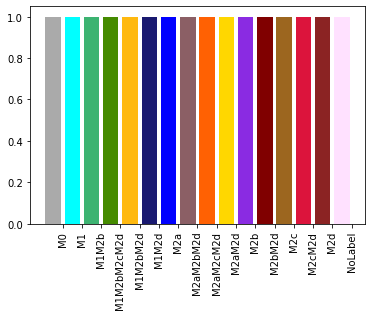

In [2]:
colors = {
"M0"	:	(170./255,170./255,170./255),
"M1"	:	(0/255,255./255,255./255),
"M2a"	:	(0/255,0/255,255./255),
"M2b"	:	(138./255,43./255,226./255),
"M2c"	:	(156./255,102./255,31./255),
"M2d"	:	(139./255,35./255,35./255),
"M2aM2cM2d"	:	(255./255,97./255,3./255),
"M1M2bM2cM2d"	:	(69./255,139./255,0./255),
"M2cM2d"	:	(220./255,20./255,60./255),
"M1M2bM2d"	:	(255./255,185./255,15./255),
"M2aM2d"	:	(255./255,215./255,0./255),
"M2aM2bM2d"	:	(139./255,95./255,101./255),
"M2bM2d"	:	(128./255,0./255,0./255),
"M1M2b"	:	(60./255,179./255,113./255),
"M1M2d"	:	(25./255,25./255,112./255),
"NoLabel"	:	(255./255,225./255,255./255)

            }

colors = OrderedDict(sorted(colors.items(), key=lambda t: t[0]))


plt.bar(range(len(colors)), [1]*len(colors), color=colors.values() )
plt.xticks(np.arange(0.5,len(colors)+.5,1), list(colors.keys()), rotation='vertical')
plt.savefig('ColorCode.svg')
plt.show()

In [3]:
def labelState(x):
    #x = [STAT3,SMAD23,STAT6,SOCS1,TLR4,NFKB,STAT1,SOCS3,AP1,IL10,TNFA,  TGFB,  Fra1, HIF1A, ERK,  IL4e, IL10e, TNFAe, TGFBe,  IgG,   A2a,   IFNG,  IFNB,  IL1B,  IL6e,  MCSF,   GMCSF,  Hipoxia,  GCGCR] 
    #x    x[0]   x[1]   x[2]  x[3] x[4]  x[5] x[6]  x[7] x[8] x[9] x[10] x[11]  x[12] x[13]  x[14] x[15] x[16]  x[17]   x[18]  x[19]  x[20]  x[21]  x[22]  x[23]  x[24]  x[25]   x[26]   x[27]     x[28]
    label = ''
    feno = ''
    fl = 0
    if (x[0]<=0.25) and (x[2]<=0.25) and (x[5]<=0.25) and (x[6]<=0.25) and (x[8]<=0.25) and (x[12]<=0.25) and (x[13]<=0.25) and (x[14]<=0.25): 
        label = ("M0")
        fl += 1
        feno += label
        feno += '-'
########### 
    if (x[2]>=.75) and (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
            label = ("M2aM2bM2d")
            fl += 1
            feno += label
            feno += '-'
    else:
        if (x[2]>=.75) and (x[0]>=.75) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
            label = ("M2aM2cM2d")
            fl += 1
            feno += label
            feno += '-'
        elif (x[0]>=.75) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
            label = ("M2cM2d")
            fl += 1
            feno += label
            feno += '-'
        elif (x[2]>=.75) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
            label = ("M2aM2d")
            fl += 1
            feno += label
            feno += '-'
        elif (x[2]>=.75):
            label = ("M2a")
            fl += 1
            feno += label
            feno += '-'
        elif (x[0]>=.75):
            label = ("M2c")
            fl += 1
            feno += label
            feno += '-'
        elif ((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75):
            label = ("M2d")
            fl += 1
            feno += label
            feno += '-'
        else:
            if ((x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75))) and (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)) and (x[0]>=.75) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
                label = ("M1M2bM2cM2d")
                fl += 1
                feno += label
                feno += '-'
            elif ((x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75))) and (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
                label = ("M1M2bM2d")
                fl += 1
                feno += label
                feno += '-'
            elif ((x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75))) and (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)):
                label = ("M1M2b")
                fl += 1
                feno += label
                feno += '-'
            elif ((x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75))) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
                label = ("M1M2d")
                fl += 1
                feno += label
                feno += '-'
            elif (((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75)) and (((x[4]>=0.75) and (x[20]>=0.75)) or ((x[12]>=0.75) and (x[8]>=0.75)) or (x[13]>=0.75) or (x[12]>=0.75)):
                label = ("M2bM2d")
                fl += 1
                feno += label
                feno += '-'
            elif ((x[23]>=.75) and (x[8]>=0.75)) or (x[14]>=0.75): 
                label = ("M2b")
                fl += 1
                feno += label
                feno += '-'
            elif (x[5]>=0.75) or (x[6]>=0.75) or ((x[10]>=0.75) and (x[8]>=0.75)) or ((x[17]>=0.75) and (x[8]>=0.75)): 
                label = ("M1")
                fl += 1
                feno += label
                feno += '-'
############
    if (label == ""): label = "NoLabel"
#    print(feno,fl)
    return label

In [4]:
def label_simulation_csv(df):
    df = pd.read_csv(name, index_col=0)
    df["Label"] = df.apply(labelState, axis=1)
    name = name.replace("-A","A").replace("-B","B").replace("-C","C").replace("-","_").replace(".csv","")
    path = name.split("/")[0] + "/"
    name = name.split("/")[1].split("_")
    name = "_".join([name[0], df["Label"].iloc[0], df["Label"].iloc[-1], name[-1]]) + ".csv"
    df.to_csv(path+'Clean/'+name)
    return df


In [5]:
def analyse_simulation_csv(path,name, threshold=.25, sep=','):
    """
    Toma un csv con los resultados de la simulacion
    Regresa:
        * Entorno
        * Etiqueta inicial
        * Etiqueta final
        * Nodo perturbado
        * Transicion
    En el nombre del archivo 
        * primero es el entorno, 
        * segundo el estado inicial, 
        * ultimo el gen perturbado
    En el archivo:
        * Primera fila genes
        * Primera columna valor perturbado
        * Penultima fila differencia con vector inicial
        * Ultima fila etiqueta
    Si el nodo modificado es un input (termina con e) al calcular la diferencia se ignora el gen modificado, 
        para compenzar el error de que su expresión es constante.
        """
    df = pd.read_csv(path+"/csv/"+name, index_col=0)
    env  = name.replace('.csv','').split('_')[0]
    node = name.replace('.csv','').split('_')[-1]
    # Clean and rewrite csv
    if node[-1]=='e': #if node is an input ignore value of input, as it is constant
        first_row = df.drop(node.split('+'), axis=1).iloc[[0]].values[0]
        df["Sum"] = df.drop(node.split('+'), axis=1).apply(lambda row: sum(abs(row - first_row)), axis=1)
    else:
        first_row = df.iloc[[0]].values[0]
        df["Sum"] = df.apply(lambda row: sum(abs(row - first_row)), axis=1)
    df["Label"] = df.apply(labelState, axis=1)
    df.to_csv(path+"/csv-clean/"+name)
    # Create output for TransitionTable file
    init = df["Label"].iloc[0]
    final = df["Label"].iloc[-1]
    labels = set(df["Label"].unique())
    if len(labels) == 1: 
        transition = 'None'
        labels = 1
    else:
        if "NoLabel" in labels: labels = len(labels) - 1
        else: labels = len(labels)
        first_row = df.drop('Label', axis=1).iloc[[0]].values[0]
        df = df.set_index(np.arange(0,len(df),1))
        df["Sum"] = df.drop('Label', axis=1).apply(lambda row: sum(abs(row - first_row)), axis=1)
        df["Diff"] = df["Sum"].diff().abs()
        jumps = df.index[(df["Diff"] >= threshold)]
        if len(jumps) == 0: transition = 'Soft'
        else: transition = 'Hard_' + str(len(jumps))    
    return [env, init, final, node, transition, str(labels)]


In [6]:
def plot_simulation_csv(path,name, colors, unique=True):
    
    df = pd.read_csv(path+"/csv-clean/"+name, index_col=0)
    #print( name )
    if unique and len(df["Label"].unique()) > 1: return
    #print(df["Label"].unique())
#    print( df["Label"].map(colors))
    df["Color"] = df["Label"].map(colors)
    #df = df.iloc[::4, :] #select only some points
    title = name.replace('.csv','')
    fig = plt.figure()
    plt.figure(figsize=(3,2))
    #plt.xlabel(title.split('_')[-1])
    plt.gcf().text(0.5, -0.1, title.split('_')[-1], fontsize=10,rotation=0)
    plt.ylabel("Difference")
    plt.axis([-.1, 1.1, df["Sum"].min()-.3, df["Sum"].max()+.3])
    plt.text(-0.05,df["Sum"].min()+0,df["Label"].iloc[0])
    plt.text(1.1-len(df["Label"].iloc[-1])*0.005,df["Sum"].max()*.8,df["Label"].iloc[-1],ha="right")
    plt.scatter(df.index, df.Sum, c=df.Color)
    plt.savefig(path+"/svg-color/"+name.replace('.csv','.svg'))
    plt.close()
    #return df

In [15]:
path = os.getcwd()
print(path)
folder = "Results-M2bM2d-env"
path = path+"/"+folder
print(path)

C:\Users\Lenovo\Documents\Python
C:\Users\Lenovo\Documents\Python/Results-M2bM2d-env


In [16]:
#path = "."
f = open(path +'/TransitionTable.csv','w')
f.write("Environment,Init label, Final label, Perturbed node, Transition,Number labels\n")

78

In [19]:
os.listdir(path+"/csv")

['M2bM2dProb_A2a+Hipoxia+GCGCR.csv',
 'M2bM2dProb_IFNG+IFNB.csv',
 'M2bM2dProb_IgG+GCGCR.csv',
 'M2bM2dProb_IL10e+IL6e+MCSF.csv',
 'M2bM2dProb_IL1B+TNFAe.csv',
 'M2bM2dProb_IL4e+TGFBe.csv']

In [20]:
for file in os.listdir(path+"/csv"):
    print(file)
    if not os.path.exists(path+"/csv-clean"): os.makedirs(path+"/csv-clean")
    f.write( ','.join( analyse_simulation_csv(path,file) )+'\n' )
    if not os.path.exists(path+"/svg-color"): os.makedirs(path+"/svg-color")
    plot_simulation_csv(path,file, colors, unique=False)


M2bM2dProb_A2a+Hipoxia+GCGCR.csv
M2bM2dProb_IFNG+IFNB.csv
M2bM2dProb_IgG+GCGCR.csv
M2bM2dProb_IL10e+IL6e+MCSF.csv
M2bM2dProb_IL1B+TNFAe.csv
M2bM2dProb_IL4e+TGFBe.csv


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>